**Data Preprocessing**

In [1]:
#load the data
import pandas as pd
data = pd.read_csv("FINAL_171_DATASET.csv")

In [2]:
#view the variables / column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductRelated           12330 non-null  int64  
 1   ProductRelated_Duration  12330 non-null  float64
 2   BounceRates              12330 non-null  float64
 3   ExitRates                12330 non-null  float64
 4   Month                    12330 non-null  object 
 5   OperatingSystems         12330 non-null  int64  
 6   Browser                  12330 non-null  int64  
 7   Region                   12330 non-null  int64  
 8   TrafficType              12330 non-null  int64  
 9   VisitorType              12330 non-null  object 
 10  Weekend                  12330 non-null  bool   
 11  Revenue                  12330 non-null  bool   
 12  Quarter                  12330 non-null  object 
dtypes: bool(2), float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [3]:
#check to see if we have any missing values
data.isnull().sum()
#we have missing values in the quarters

,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
Month,0
OperatingSystems,0
Browser,0
Region,0
TrafficType,0
VisitorType,0


In [4]:
#convert 'revenue' to integers
data['Revenue'] = data['Revenue'].astype(int)

#check
print(data['Revenue'].unique())


[0 1]


In [5]:
#convert Revenue (a categorical variable) into a binary/factor
data["Weekend"] = data["Weekend"].astype(int)

In [6]:
#encoding

categorical_columns = ['Month', 'Quarter']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())


   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  \
0                 1        1       1            1  Returning_Visitor        0   
1                 2        2       1            2  Returning_Visitor        0   
2                 4        1       9            3  Returning_Visitor        0   
3                 3        2       2            4  Returning_Visitor        0   
4                 3        3       1            4  Returning_Visitor        1   

   ...  Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  \
0  ...      Fal

In [7]:
print(data['VisitorType'].value_counts())


VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


In [8]:
data_encoded = pd.get_dummies(data, columns=['Month', 'Quarter', 'VisitorType'], drop_first=False)
print(data_encoded.head())


   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0               1                 0.000000         0.20       0.20   
1               2                64.000000         0.00       0.10   
2               1                 0.000000         0.20       0.20   
3               2                 2.666667         0.05       0.14   
4              10               627.500000         0.02       0.05   

   OperatingSystems  Browser  Region  TrafficType  Weekend  Revenue  ...  \
0                 1        1       1            1        0        0  ...   
1                 2        2       1            2        0        0  ...   
2                 4        1       9            3        0        0  ...   
3                 3        2       2            4        0        0  ...   
4                 3        3       1            4        1        0  ...   

   Month_Nov  Month_Oct  Month_Sep  Quarter_Q1  Quarter_Q2  Quarter_Q3  \
0      False      False      False        True  

In [9]:
#initially, the months do not come in order so the code below fixes for that
data['Month'] = data['Month'].str.strip().str.title()

#replace abbreviations with full month names
data['Month'] = data['Month'].replace({
    "Jan": "January", "Feb": "February", "Mar": "March", "Apr": "April",
    "May": "May", "Jun": "June", "Jul": "July", "Aug": "August",
    "Sep": "September", "Oct": "October", "Nov": "November", "Dec": "December"
})

#check
print(data['Month'].unique())



['February' 'March' 'May' 'October' 'June' 'July' 'August' 'November'
 'September' 'December']


In [10]:
print(data['Month'].unique())  #verify the unique values in the Month column

['February' 'March' 'May' 'October' 'June' 'July' 'August' 'November'
 'September' 'December']


In [24]:
#scaling the numerical variables

from sklearn.preprocessing import StandardScaler

numerical_vars = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']

scaler = StandardScaler()
data_encoded[numerical_vars] = scaler.fit_transform(data_encoded[numerical_vars])

print("Standardized Data (first 5 rows):")
print(data_encoded[numerical_vars].head())


Standardized Data (first 5 rows):
   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
0       -0.691003                -0.624348     3.667189   3.229316
1       -0.668518                -0.590903    -0.457683   1.171473
2       -0.691003                -0.624348     3.667189   3.229316
3       -0.668518                -0.622954     0.573535   1.994610
4       -0.488636                -0.296430    -0.045196   0.142551


In [26]:
#save the scaled dataset

data_encoded.to_csv("171_FINAL_DATASET.csv", index=False)
data_new = data = pd.read_csv("171_FINAL_DATASET.csv")
print("Scaled dataset saved as '171_FINAL_DATASET.csv'.")


Scaled dataset saved as '171_FINAL_DATASET.csv'.


**Exploratory Data Analysis**

In [27]:
#summary statistics
data_new.describe()


,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,4.610172e-17,-8.298309e-17,-3.227120e-17,3.918646e-17,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


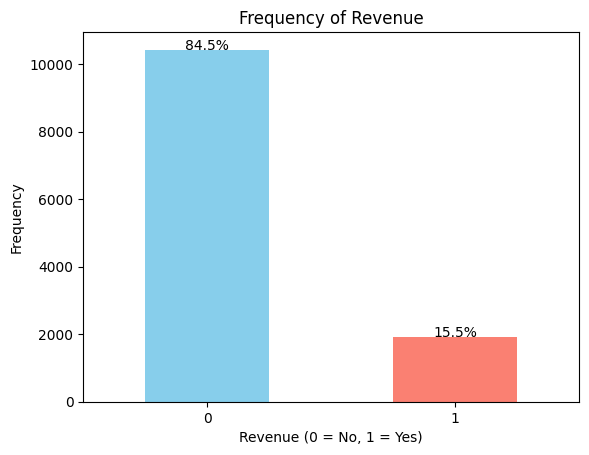

In [12]:
#let's visualize the distribution of our target variable, Revenue
import matplotlib.pyplot as plt

value_counts = data['Revenue'].value_counts()
percentages = (value_counts / len(data['Revenue'])) * 100

value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Frequency of Revenue')
plt.xlabel('Revenue (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)

for i, (count, percent) in enumerate(zip(value_counts, percentages)):
    plt.text(i, count + 10, f'{percent:.1f}%', ha='center', fontsize=10)

plt.show()

#commentary: given the clear imbalance in our dataset, with only about 15% of shopping sessions resulting in purchases, it’s logical to
#interpret these findings as reflective of common shopping behavior, since browsing will often not lead to a purchase.

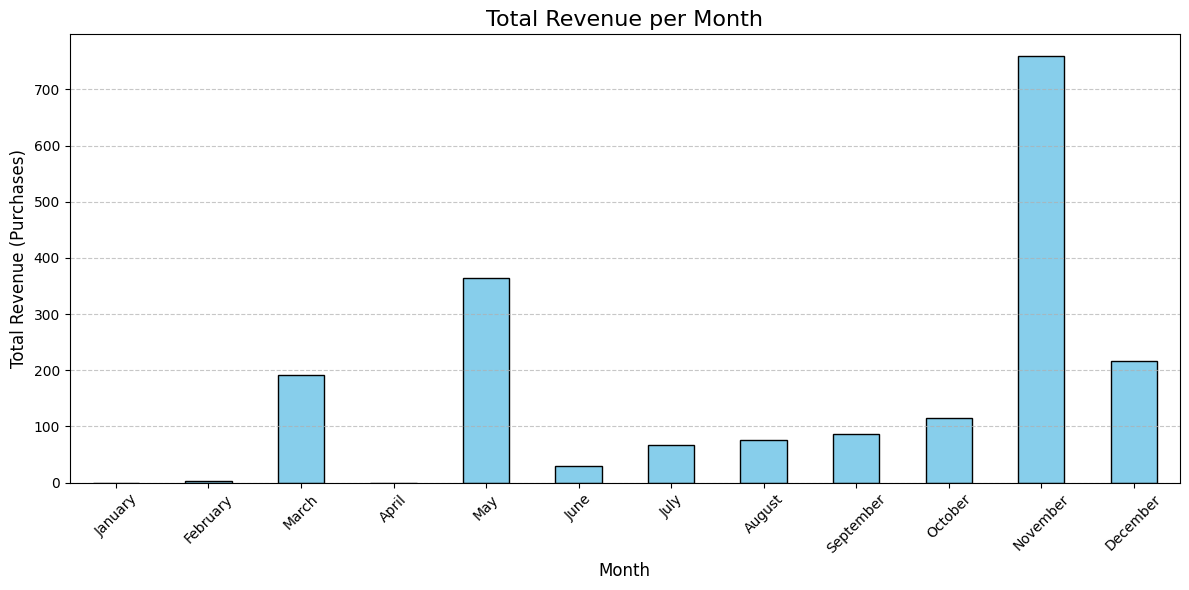

In [13]:
#visualize revenue per month

import pandas as pd
import matplotlib.pyplot as plt

#convert revenue to integers
data['Revenue'] = data['Revenue'].astype(int)

data['Month'] = data['Month'].replace({
    "Jan": "January", "Feb": "February", "Mar": "March", "Apr": "April",
    "May": "May", "Jun": "June", "Jul": "July", "Aug": "August",
    "Sep": "September", "Oct": "October", "Nov": "November", "Dec": "December"
})

#define all months in order
all_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

#group by month and calculate total revenue
monthly_revenue = data.groupby('Month')['Revenue'].sum()

#reindex to ensure all months are present
monthly_revenue = monthly_revenue.reindex(all_months, fill_value=0)

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Revenue per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (Purchases)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#commentary: there are a lot more purchases in the holiday months or months leading up to them

In [14]:
#standardize the month abbreviations to full names
data['Month'] = data['Month'].str.strip().str.capitalize()  # Capitalize and strip spaces
data['Month'] = data['Month'].replace({
    "Jan": "January", "Feb": "February", "Mar": "March", "Apr": "April",
    "May": "May", "Jun": "June", "Jul": "July", "Aug": "August",
    "Sep": "September", "Oct": "October", "Nov": "November", "Dec": "December"
})

# Verify the replacements
print(data['Month'].unique())

#define the correct order for months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

#convert 'Month' to categorical with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)


['February' 'March' 'May' 'October' 'June' 'July' 'August' 'November'
 'September' 'December']


<ipython-input-15-032a05de0e1f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = data.groupby('Month')['Revenue'].mean()


Monthly Revenue (with all months):
Month
January           NaN
February     0.016304
March        0.100682
April             NaN
May          0.108502
June         0.100694
July         0.152778
August       0.175520
September    0.191964
October      0.209472
November     0.253502
December     0.125072
Name: Revenue, dtype: float64


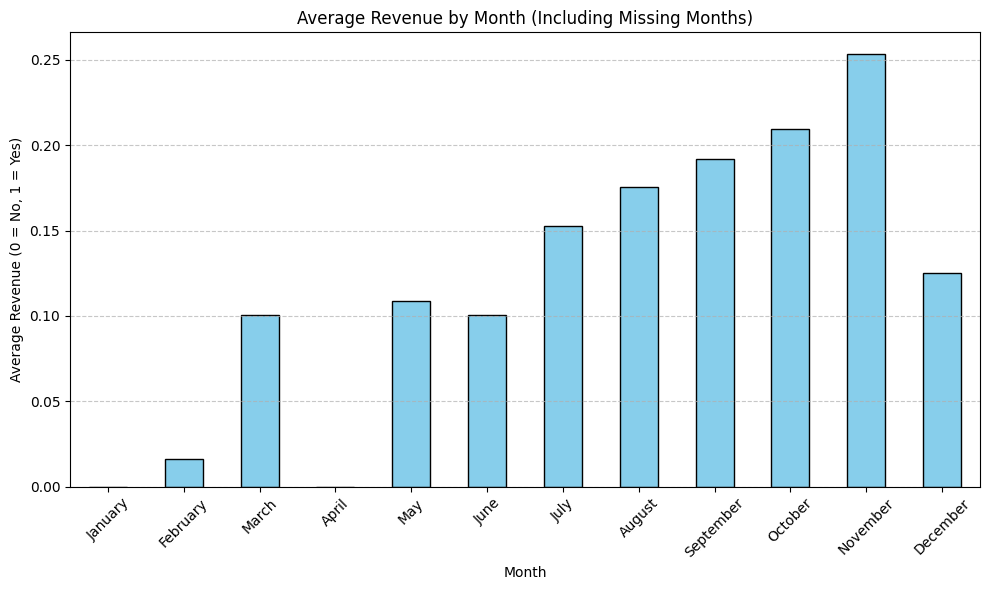

In [15]:
import matplotlib.pyplot as plt

#group by Month and calculate mean Revenue
monthly_revenue = data.groupby('Month')['Revenue'].mean()

#reindez to include all months
monthly_revenue = monthly_revenue.reindex(month_order, fill_value=0)

print("Monthly Revenue (with all months):")
print(monthly_revenue)

monthly_revenue.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title("Average Revenue by Month (Including Missing Months)")
plt.xlabel("Month")
plt.ylabel("Average Revenue (0 = No, 1 = Yes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#commentary: shows the average revenue (probability of a purchase) by month

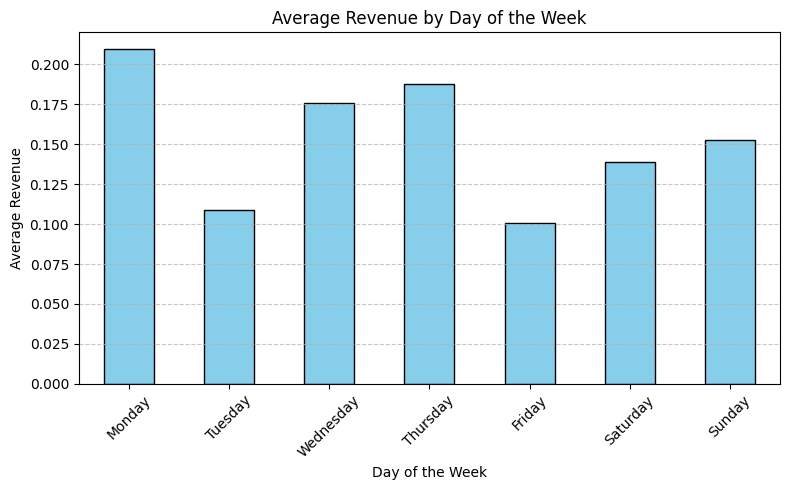

In [16]:
#prob of making a purchase per day of the week
data['Day_of_Week'] = pd.to_datetime(data['Month'], format='%B').dt.day_name()

#aggregate revenue by day of the week
day_revenue = data.groupby('Day_of_Week')['Revenue'].mean()

day_revenue = day_revenue.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

day_revenue.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title("Average Revenue by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#commentary: Mondays have the highest purchasing intent, which could reflect consumer behavior such as planning and executing purchases at the start of the week.
#Weekend days (Saturday and Sunday) demonstrate moderate purchasing activity, which may reflect leisure shopping habits, but overall there isn't much difference
#across the days. We will not include this feature in our models

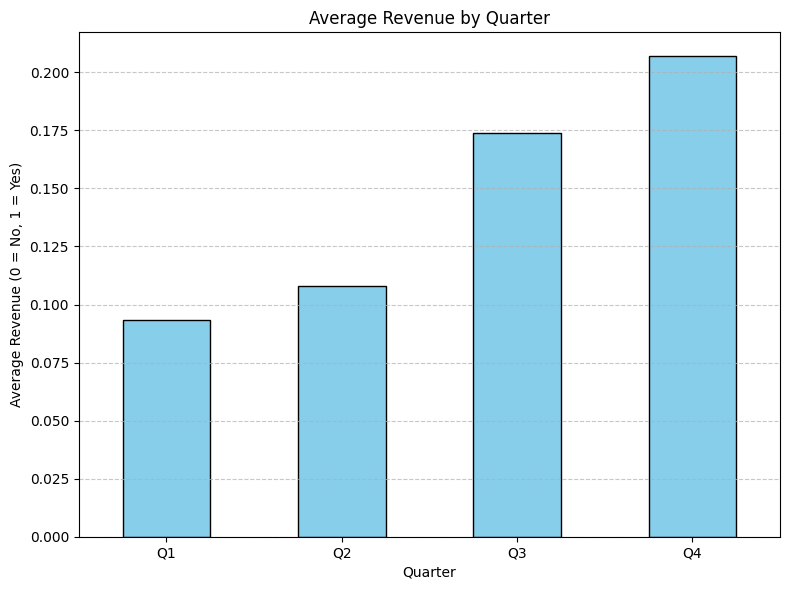

In [17]:
#revenue per quarter
quarterly_revenue = data.groupby('Quarter')['Revenue'].mean()

quarterly_revenue.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title('Average Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Revenue (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#commentary: reveals a clear upward trend, with revenue increasing from Q1 through Q4. Q3 and Q4 show the highest average revenue, suggesting that user purchasing
#behavior is more prominent in the latter half of the year, potentially driven by factors such as seasonal promotions or holidays

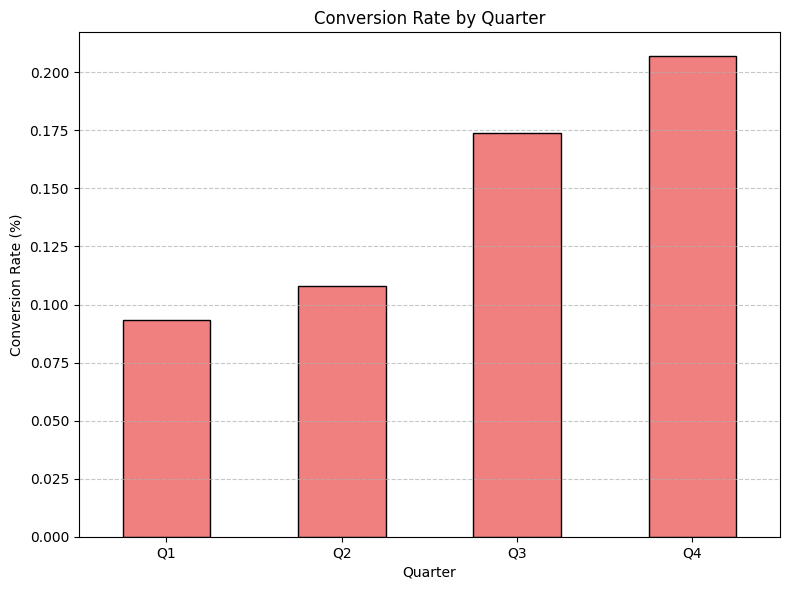

In [18]:
#calculate conversion rate
conversion_rate = data.groupby('Quarter')['Revenue'].mean()

conversion_rate.plot(kind='bar', color='lightcoral', edgecolor='black', figsize=(8, 6))
plt.title('Conversion Rate by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#commentary: the conversion rate measures the percentage of online shopping sessions that result in a purchase. It shows how effectively the site encourages
#visitors to complete transactions. For example, the higher conversion rate in Q4 highlights a strong purchasing trend during the holiday season, while lower rates
#in Q1 suggest potential areas to improve engagement or promotions.

<ipython-input-19-0ccedb1e40a0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visitor_data, x='VisitorType', y='ConversionRate', palette=colors)


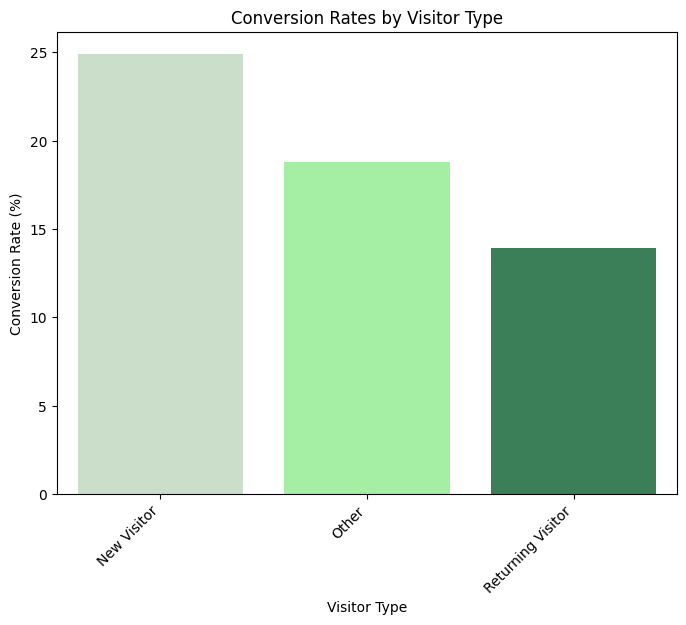

In [19]:
#visualizing conversion rate by visitor type

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#use the calculated conversion rates
visitor_data = pd.DataFrame({
    'VisitorType': ['New Visitor', 'Other', 'Returning Visitor'],
    'ConversionRate': [24.91, 18.82, 13.93]
})

colors = ["#c6e2c6", "#98fb98", "#2e8b57"]

plt.figure(figsize=(8, 6))
sns.barplot(data=visitor_data, x='VisitorType', y='ConversionRate', palette=colors)

plt.title('Conversion Rates by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Conversion Rate (%)')

plt.xticks(rotation=45, ha='right')

sns.set_theme(style="whitegrid")

plt.show()


#commentary: This plot shows the conversion rates by visitor type, indicating the percentage of visitors in each category
#(New Visitor, Other, Returning Visitor) who completed a desired action. The results suggest that New Visitors have the highest
#conversion rate at 24.91%, followed by Other visitors at 18.82%, while Returning Visitors have the lowest conversion rate at 13.93%.
#This insight is significant as it highlights that new visitors are more likely to convert than returning visitors, which could inform targeted
#marketing or engagement strategies aimed at increasing conversions among different visitor segments.

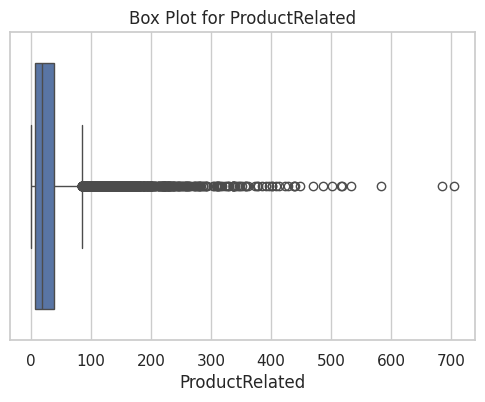

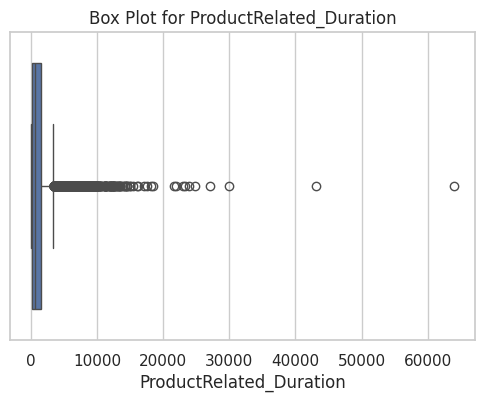

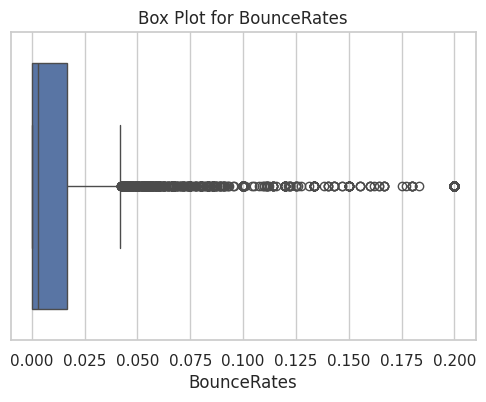

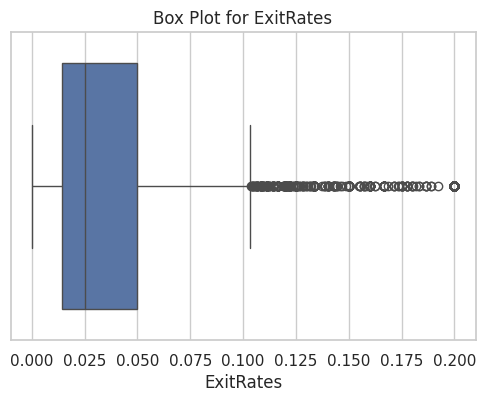

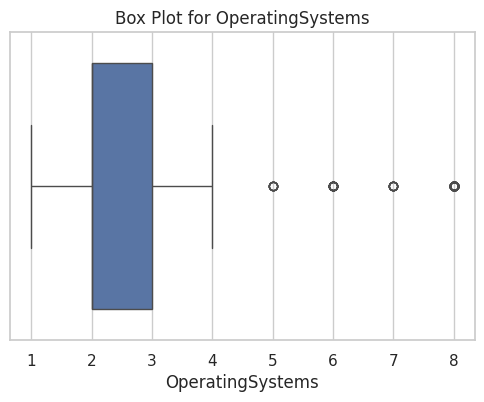

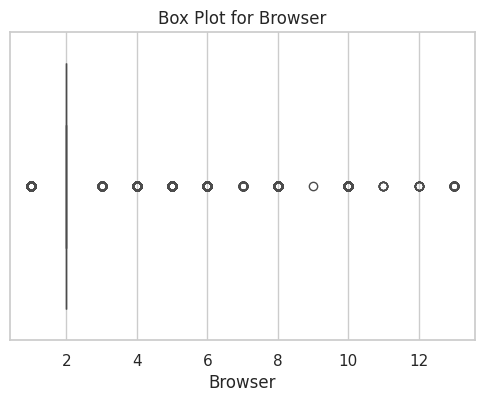

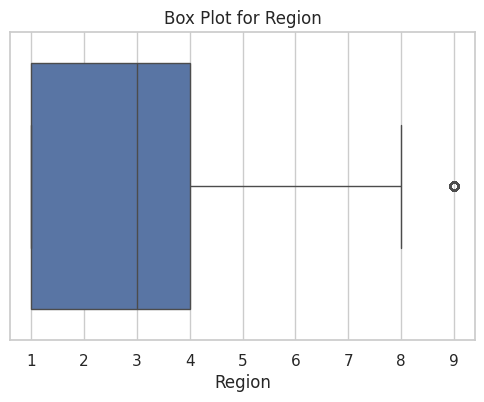

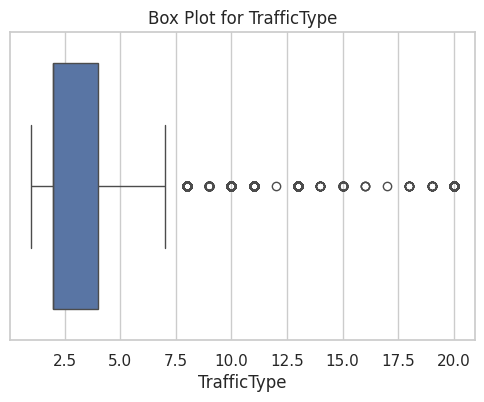

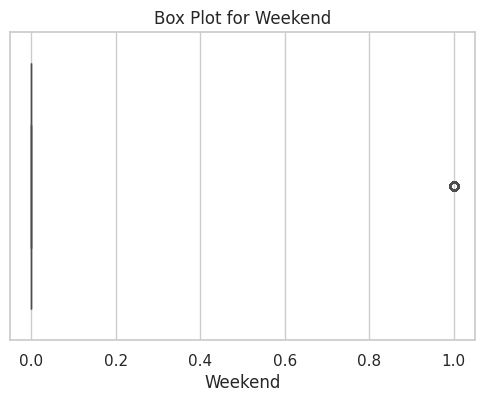

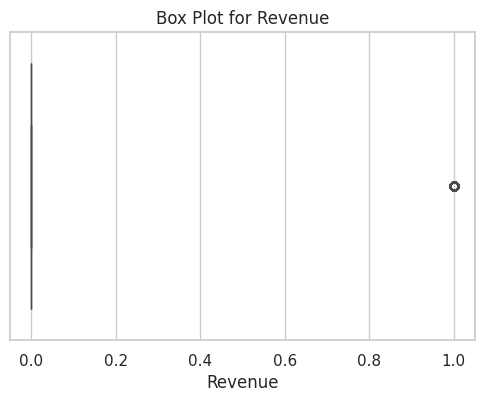

In [20]:
#outlier detection
import seaborn as sns
import matplotlib.pyplot as plt

#plot individual box plots for each feature
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=column)
    plt.title(f"Box Plot for {column}")
    plt.show()

#commentary: we have A LOT of outliers. the question is how should we handle this: transformation, remove them, identify them but keep them
#removing them will mean that we are removing a huge portion our data + previous studies kept them
#i say that we keep them bc there will be months were revenue and other activity will be a lot higher due to just how things are and we want to be able to have those trends be reflected in
#any model we create

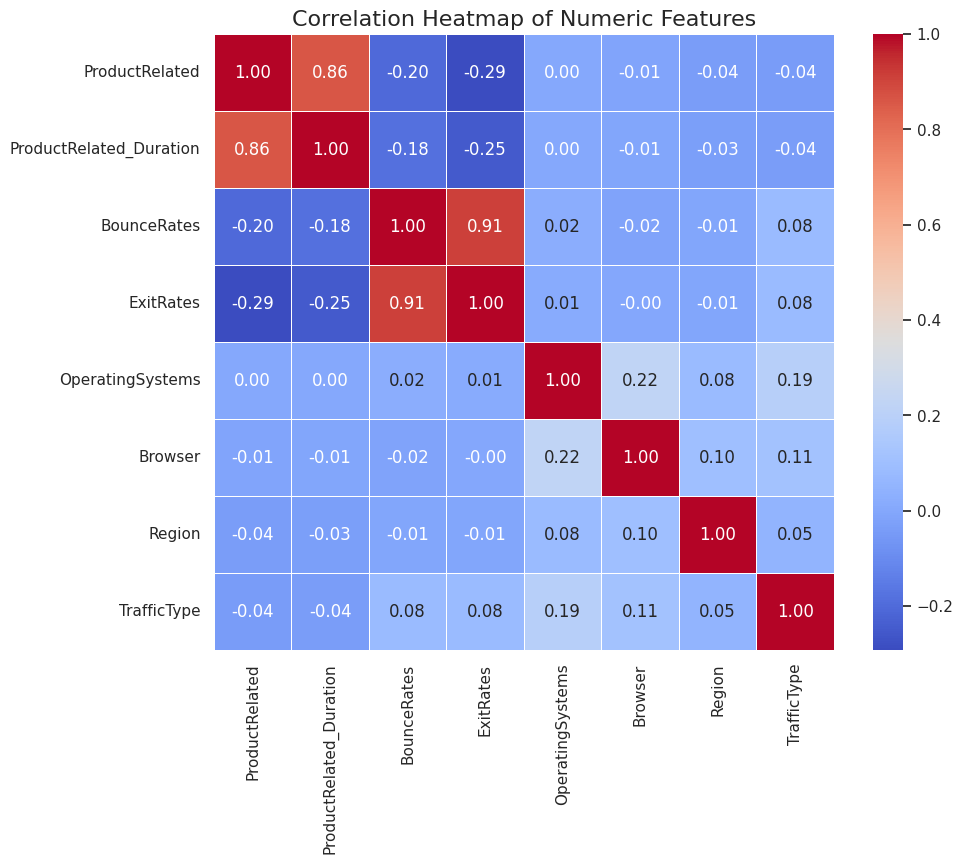

In [22]:
#correlation heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("FINAL_171_DATASET.csv")

correlation_matrix = data.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

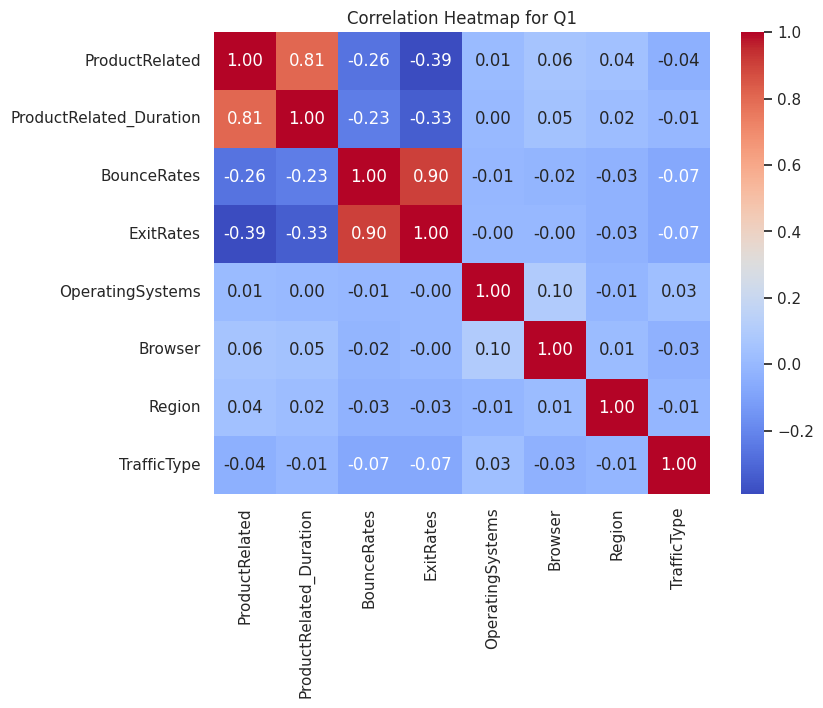

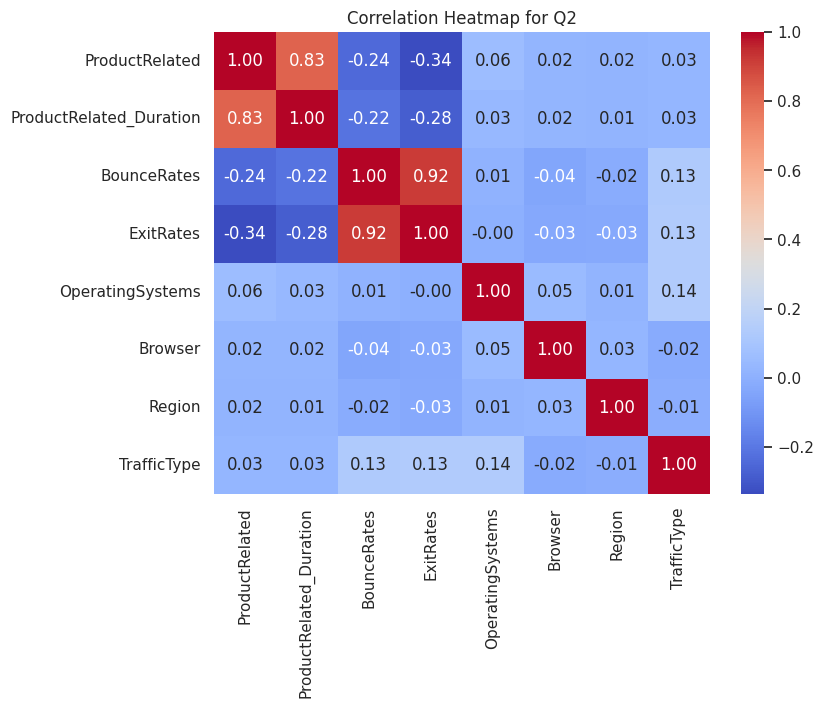

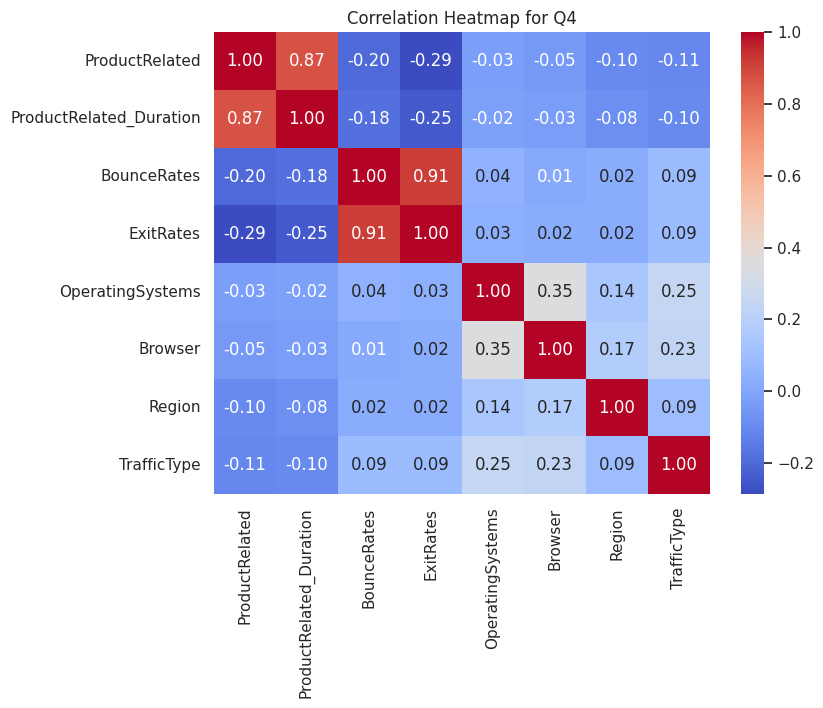

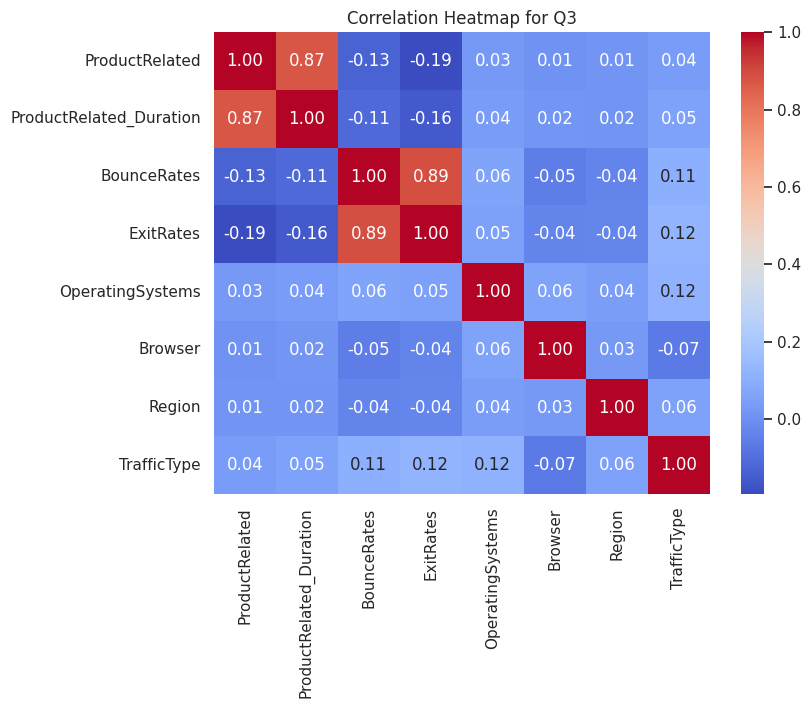

In [23]:
#correlation by quarter

import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each quarter and create a heatmap
for quarter in data['Quarter'].unique():
    subset = data[data['Quarter'] == quarter]

    # Select only numeric columns for the correlation matrix
    numeric_subset = subset.select_dtypes(include='number')

    # Calculate correlation matrix
    correlation_matrix = numeric_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {quarter}')
    plt.show()

#commentary: doesn't really show us beyond what we see with the original correlation heatmap. we will not include this in the analysis
